<a href="https://colab.research.google.com/github/palaciosestefania/T-picos-en-Ecuaciones-Diferenciales/blob/main/Actividad%204_Laplace%20(COMPLETO).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### La última sección del documento es la Actividad 4.

In [1]:
import sympy as sp #librería para matemáticas simbólicas

In [2]:
x = sp.Symbol('x') #Decaración de variables
y = sp.Symbol('y')

In [3]:
(x+y)**2 #expresión en binomio

(x + y)**2

In [4]:
((x+y)**2).expand() #expansión del binomio

x**2 + 2*x*y + y**2

In [5]:
((x+y)**2).subs(x, 1) #x con valor 1

(y + 1)**2

In [6]:
1/( (x+2)*(x+1) ) #expresión

1/((x + 1)*(x + 2))

In [7]:
sp.apart(1/( (x+2)*(x+1) ), x) #descompone la expresión en fracciones parciales con la variable x

-1/(x + 2) + 1/(x + 1)

In [8]:
(x+1)/(x-1) #expresión

(x + 1)/(x - 1)

In [9]:
sp.apart((x+1)/(x-1), x) #descompone en fracciones parciales

1 + 2/(x - 1)

In [10]:
sp.apart(36*x-1/(x**2 + 2*x + 5), x) #descompone en fracciones parciales

36*x - 1/(x**2 + 2*x + 5)

In [12]:
sp.factor(x**2 + 2*x + 5) #factoriza?

x**2 + 2*x + 5

In [13]:
sp.simplify(x**2 + 2*x + 5) #simplifica la expresión

x**2 + 2*x + 5

In [14]:
sp.apart(36*x-4/((x+1)**2 + 4), x) #descompone en fracciones parciales

36*x - 4/(x**2 + 2*x + 5)

In [15]:
sp.apart((x**2 - 7*x + 24)/((x-1)*(x-2)*(x-4)), x) #descompone en fracciones parciales

6/(x - 1) - 7/(x - 2) + 2/(x - 4)

## Transformada de Laplace

In [17]:
t, s = sp.symbols("t, s") #declaración de variables

In [18]:
a = sp.symbols("a", real=True, positive=True) #a como variable real y positiva

In [26]:
#fun = sp.exp(-a*t)
#fun=t**4
fun = sp.sin(a*t)

In [53]:
Fs = sp.laplace_transform(fun, t, s, noconds=True) #transfromada de Laplace y los argumentos que necesitamos
#fun es la función a la que aplicaremos la transformada
#s la variable de la transformada
#noconds=True #no devolverá las condiciones bajo las cuales la transformada de Laplace converge"

In [54]:
Fs #imprime el resultado de la transformada de la función

a/(a**2 + s**2)

## Función escalón

In [29]:
t = sp.Symbol('t') #declaración de variable

In [59]:
u = sp.Heaviside(t) #función Heaviside (escalón unitaria) que se aplica a la variable t
#si t es positiva, la función es igual a 1, si es negativa es igual a cero
ft = u - u.subs(t,t-1) #sustituye a t como t-2

In [60]:
ft

Heaviside(t) - Heaviside(t - 1)

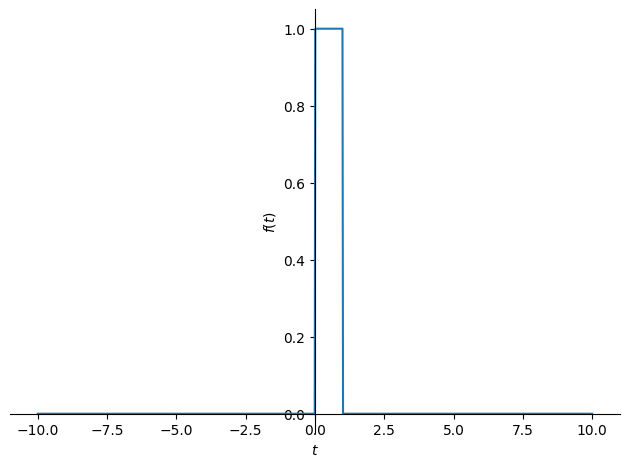

In [61]:
c1=sp.plotting.plot(ft)

In [37]:
d = sp.DiracDelta(t)

In [38]:
d

DiracDelta(t)

In [63]:
#c2=sp.plotting.plot(d)

In [40]:
gt = sp.exp(-2*t)*u + sp.exp(-t)*sp.cos(3*t)*u

In [41]:
gt

exp(-t)*cos(3*t)*Heaviside(t) + exp(-2*t)*Heaviside(t)

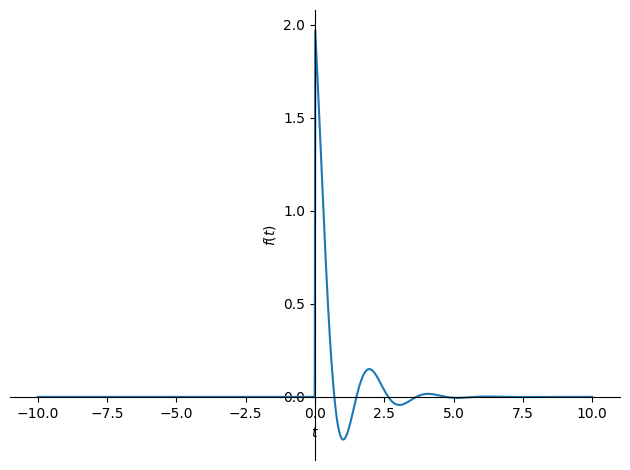

In [42]:
c3=sp.plotting.plot(gt)

In [43]:
ht = d - 3*d.subs(t,t-2) + 2*d.subs(t,t-3)

In [44]:
ht

DiracDelta(t) + 2*DiracDelta(t - 3) - 3*DiracDelta(t - 2)

In [62]:
#c4=sp.plotting.plot(ht)

## Actividad 4


#### Ejercicio a)

In [251]:
import sympy as sp #métodos numéricos
import numpy as np #vectores
import scipy as pp #calculos simbólicos
import matplotlib as mpl
import matplotlib.pyplot as plt

#from sympy import init_printing
#sp.init_printing()

In [291]:
t, s = sp.symbols("t, s") #declaración de variables
y=sp.Function('y')

In [292]:
ode=sp.Eq(y(t).diff(t,2)+4*y(t),0)
ode

          2           
         d            
4⋅y(t) + ───(y(t)) = 0
           2          
         dt           

In [293]:
ics={y(0):2, y(t).diff(t).subs(t,0):-8} #condiciones inciales

In [294]:
ics

⎧         ⎛d       ⎞│       ⎫
⎨y(0): 2, ⎜──(y(t))⎟│   : -8⎬
⎩         ⎝dt      ⎠│t=0    ⎭

In [295]:
fun1 = y(t).diff(t,2)+4*y(t)

In [296]:
Fs1 = Eq(laplace_transform(fun1, t, s, noconds=True),0)

In [297]:
Fs1

 2                                                                          ⎛d       ⎞│       
s ⋅LaplaceTransform(y(t), t, s) - s⋅y(0) + 4⋅LaplaceTransform(y(t), t, s) - ⎜──(y(t))⎟│    = 0
                                                                            ⎝dt      ⎠│t=0    

In [298]:
Fs2 = Fs1.subs(ics)
Fs2

 2                                                                            
s ⋅LaplaceTransform(y(t), t, s) - 2⋅s + 4⋅LaplaceTransform(y(t), t, s) + 8 = 0

In [299]:
Lap=laplace_transform(y(t),t,s)

In [300]:
Fs2_sol=solve(Fs2,Lap)[0]
Fs2_sol

⎛2⋅(s - 4)          ⎞
⎜─────────, -∞, True⎟
⎜  2                ⎟
⎝ s  + 4            ⎠

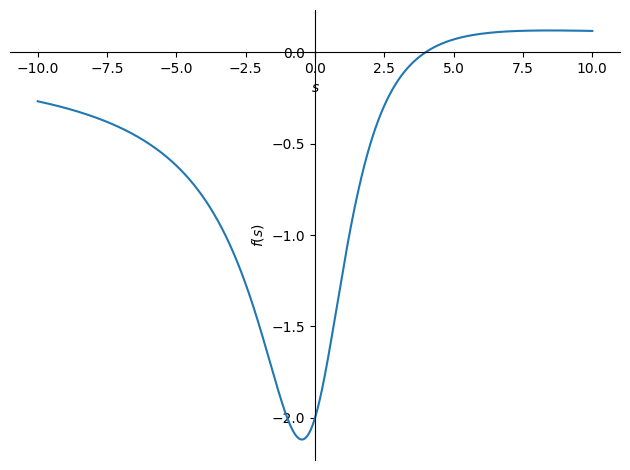

In [301]:
CSol2=sp.plotting.plot(Fs2_sol)

In [302]:
Inverse_Fs2=inverse_laplace_transform(Fs2_sol[0],s,t)
Inverse_Fs2

2⋅(-2⋅sin(2⋅t) + cos(2⋅t))⋅θ(t)

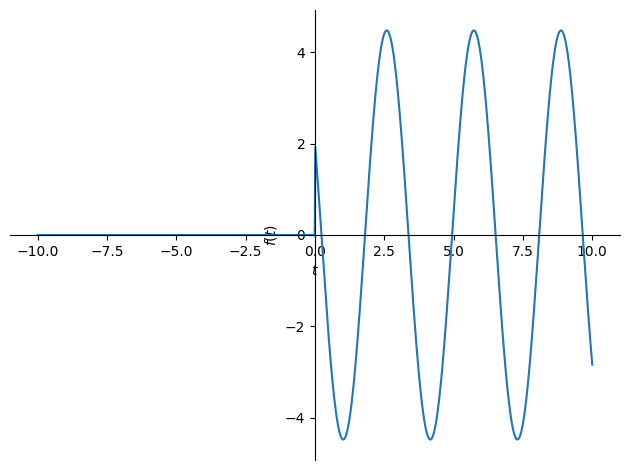

In [303]:
cFs2=sp.plotting.plot(Inverse_Fs2)

#### Ejercicio b)

In [304]:
import sympy as sp #métodos numéricos
import numpy as np #vectores
import scipy as pp #calculos simbólicos
import matplotlib as mpl
import matplotlib.pyplot as plt

#from sympy import init_printing
#sp.init_printing()

In [305]:
t, s = sp.symbols("t, s") #declaración de variables
y=sp.Function('y')

In [306]:
ode=sp.Eq(4*y(t).diff(t,2)+pi**2*y(t),0)
ode

             2           
 2          d            
π ⋅y(t) + 4⋅───(y(t)) = 0
              2          
            dt           

In [307]:
ics={y(0):0, y(t).diff(t).subs(t,0):1} #condiciones inciales
ics

⎧         ⎛d       ⎞│      ⎫
⎨y(0): 0, ⎜──(y(t))⎟│   : 1⎬
⎩         ⎝dt      ⎠│t=0   ⎭

In [308]:
fun2 = 4*y(t).diff(t,2)+pi**2*y(t)
Fs_fun2 = Eq(laplace_transform(fun2, t, s, noconds=True),0)
Fs_fun2

   2                                            2                                  ⎛d       ⎞│     ↪
4⋅s ⋅LaplaceTransform(y(t), t, s) - 4⋅s⋅y(0) + π ⋅LaplaceTransform(y(t), t, s) - 4⋅⎜──(y(t))⎟│     ↪
                                                                                   ⎝dt      ⎠│t=0  ↪

↪    
↪ = 0
↪    

In [322]:
Fs_fun2_ = Fs_fun2.subs(ics)
Fs_fun2_

   2                                 2                                     
4⋅s ⋅LaplaceTransform(y(t), t, s) + π ⋅LaplaceTransform(y(t), t, s) - 4 = 0

In [356]:
Lap=laplace_transform(y(t),t,s)
Fs_fun2_sol=solve(Fs_fun2_,Lap)[0]
Fs_fun2_sol

⎛    4              ⎞
⎜─────────, -∞, True⎟
⎜   2    2          ⎟
⎝4⋅s  + π           ⎠

In [357]:
Inverse_2=inverse_laplace_transform(Fs_fun2_sol[0],s,t)
Inverse_2

     ⎛π⋅t⎞     
2⋅sin⎜───⎟⋅θ(t)
     ⎝ 2 ⎠     
───────────────
       π       

In [358]:
Inverse_2_of= Inverse_2.subs(ics)
Inverse_2_of

     ⎛π⋅t⎞     
2⋅sin⎜───⎟⋅θ(t)
     ⎝ 2 ⎠     
───────────────
       π       

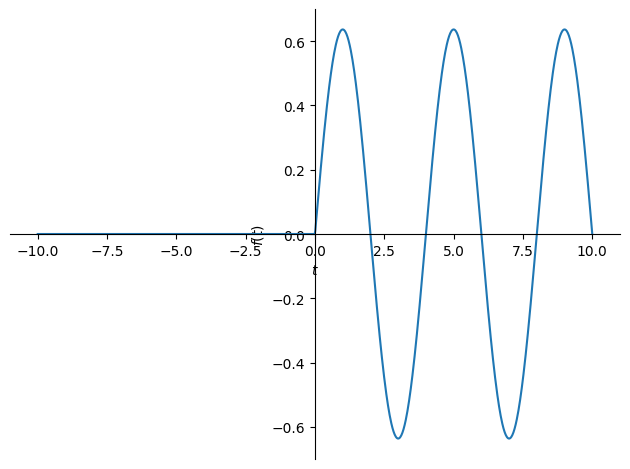

In [359]:
c2=sp.plotting.plot(Inverse_2_of)

#### Ejercicio d)

In [334]:
import sympy as sp #métodos numéricos
import numpy as np #vectores
import scipy as pp #calculos simbólicos
import matplotlib as mpl
import matplotlib.pyplot as plt

#from sympy import init_printing
#sp.init_printing()

In [335]:
t, s = sp.symbols("t, s") #declaración de variables
y=sp.Function('y')

In [336]:
ode1=sp.Eq(y(t).diff(t,2)+2*y(t).diff(t,1)-8*y(t),0)
ode1

                        2           
            d          d            
-8⋅y(t) + 2⋅──(y(t)) + ───(y(t)) = 0
            dt           2          
                       dt           

In [345]:
ics={y(0):0, y(t).diff(t).subs(t,0):6} #condiciones inciales
ics

⎧         ⎛d       ⎞│      ⎫
⎨y(0): 0, ⎜──(y(t))⎟│   : 6⎬
⎩         ⎝dt      ⎠│t=0   ⎭

In [346]:
fun3 = y(t).diff(t,2)+2*y(t).diff(t,1)-8*y(t)
Fs_fun3 = Eq(laplace_transform(fun3, t, s, noconds=True),0)
Fs_fun3

 2                                                                                                 ↪
s ⋅LaplaceTransform(y(t), t, s) + 2⋅s⋅LaplaceTransform(y(t), t, s) - s⋅y(0) - 8⋅LaplaceTransform(y ↪
                                                                                                   ↪

↪                       ⎛d       ⎞│       
↪ (t), t, s) - 2⋅y(0) - ⎜──(y(t))⎟│    = 0
↪                       ⎝dt      ⎠│t=0    

In [353]:
Fs_fun3_ = Fs_fun3.subs(ics)
Fs_fun3_

 2                                                                                                 ↪
s ⋅LaplaceTransform(y(t), t, s) + 2⋅s⋅LaplaceTransform(y(t), t, s) - 8⋅LaplaceTransform(y(t), t, s ↪

↪          
↪ ) - 6 = 0

In [360]:
Lap=laplace_transform(y(t),t,s)
Fs_fun3_sol=solve(Fs_fun3_,Lap)[0]
Fs_fun3_sol

⎛     6                ⎞
⎜────────────, -∞, True⎟
⎜ 2                    ⎟
⎝s  + 2⋅s - 8          ⎠

In [361]:
Inverse_3=inverse_laplace_transform(Fs_fun3_sol[0],s,t)
Inverse_3_of= Inverse_3.subs(ics)
Inverse_3_of

 2⋅t         -4⋅t     
ℯ   ⋅θ(t) - ℯ    ⋅θ(t)

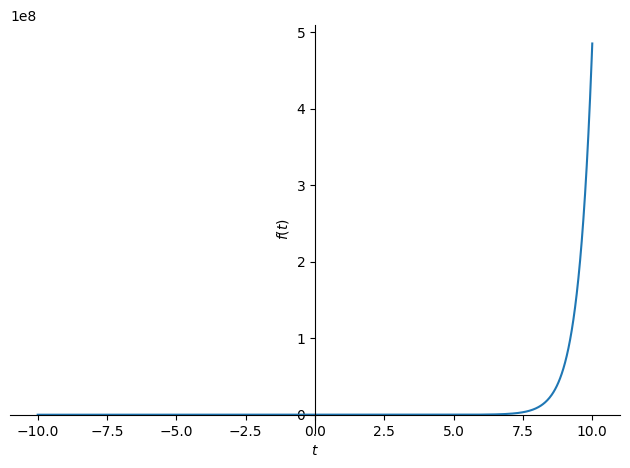

In [362]:
c3=sp.plotting.plot(Inverse_3_of)

##### Ejercicio e)

In [363]:
import sympy as sp #métodos numéricos
import numpy as np #vectores
import scipy as pp #calculos simbólicos
import matplotlib as mpl
import matplotlib.pyplot as plt

#from sympy import init_printing
#sp.init_printing()

In [364]:
t, s = sp.symbols("t, s") #declaración de variables
y=sp.Function('y')

In [366]:
ode2=sp.Eq(y(t).diff(t,2)+5*y(t).diff(t,1)+6*y(t),0)
ode2

                       2           
           d          d            
6⋅y(t) + 5⋅──(y(t)) + ───(y(t)) = 0
           dt           2          
                      dt           

In [367]:
ics={y(0):0, y(t).diff(t).subs(t,0):1} #condiciones inciales
ics

⎧         ⎛d       ⎞│      ⎫
⎨y(0): 0, ⎜──(y(t))⎟│   : 1⎬
⎩         ⎝dt      ⎠│t=0   ⎭

In [370]:
fun4 = y(t).diff(t,2)+5*y(t).diff(t,1)+6*y(t)
Fs_fun4 = Eq(laplace_transform(fun4, t, s, noconds=True),0)
Fs_fun4_ = Fs_fun4.subs(ics)
Fs_fun4_

 2                                                                                                 ↪
s ⋅LaplaceTransform(y(t), t, s) + 5⋅s⋅LaplaceTransform(y(t), t, s) + 6⋅LaplaceTransform(y(t), t, s ↪

↪          
↪ ) - 1 = 0

In [371]:
Lap=laplace_transform(y(t),t,s)
Fs_fun4_sol=solve(Fs_fun4_,Lap)[0]
Fs_fun4_sol

⎛     1                ⎞
⎜────────────, -∞, True⎟
⎜ 2                    ⎟
⎝s  + 5⋅s + 6          ⎠

In [374]:
Inverse_4=inverse_laplace_transform(Fs_fun4_sol[0],s,t)
Inverse_4_of= Inverse_4.subs(ics)
Inverse_4_of

 -2⋅t         -3⋅t     
ℯ    ⋅θ(t) - ℯ    ⋅θ(t)

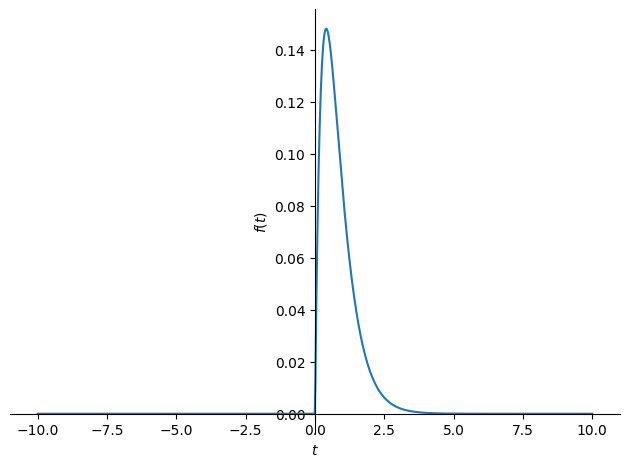

In [376]:
c4=sp.plotting.plot(Inverse_4_of)

Ejercicio f)

In [377]:
import sympy as sp #métodos numéricos
import numpy as np #vectores
import scipy as pp #calculos simbólicos
import matplotlib as mpl
import matplotlib.pyplot as plt

#from sympy import init_printing
#sp.init_printing()

In [378]:
t, s = sp.symbols("t, s") #declaración de variables
y=sp.Function('y')

In [379]:
ode3=sp.Eq(y(t).diff(t,2)-4*y(t).diff(t,1)+3*y(t),2*t-8/3)
ode3

                       2                                
           d          d                                 
3⋅y(t) - 4⋅──(y(t)) + ───(y(t)) = 2⋅t - 2.66666666666667
           dt           2                               
                      dt                                

In [380]:
ics={y(0):0, y(t).diff(t).subs(t,0):-16/3} #condiciones inciales
ics

⎧         ⎛d       ⎞│                       ⎫
⎨y(0): 0, ⎜──(y(t))⎟│   : -5.333333333333333⎬
⎩         ⎝dt      ⎠│t=0                    ⎭

In [389]:
fun5 = y(t).diff(t,2)-4*y(t).diff(t,1)+3*y(t)-2*t+8/3
Fs_fun5 = Eq(laplace_transform(fun5, t, s, noconds=True),0)
Fs_fun5_ = Fs_fun5.subs(ics)
Fs_fun5_

 2                                                                                                 ↪
s ⋅LaplaceTransform(y(t), t, s) - 4⋅s⋅LaplaceTransform(y(t), t, s) + 3⋅LaplaceTransform(y(t), t, s ↪
                                                                                                   ↪
                                                                                                   ↪

↪                        2.66666666666667   2     
↪ ) + 5.33333333333333 + ──────────────── - ── = 0
↪                               s            2    
↪                                           s     

In [390]:
Lap=laplace_transform(y(t),t,s)
Fs_fun5_sol=solve(Fs_fun5_,Lap)[0]
Fs_fun5_sol

⎛                  ⎛       2              ⎞          ⎞
⎜0.666666666666667⋅⎝- 8.0⋅s  - 4.0⋅s + 3.0⎠          ⎟
⎜──────────────────────────────────────────, -∞, True⎟
⎜           2 ⎛ 2              ⎞                     ⎟
⎝          s ⋅⎝s  - 4.0⋅s + 3.0⎠                     ⎠

In [391]:
Inverse_5=inverse_laplace_transform(Fs_fun5_sol[0],s,t)
Inverse_5_of= Inverse_5.subs(ics)
Inverse_5_of

                                t             3.0⋅t     
0.666666666666667⋅t⋅θ(t) + 3.0⋅ℯ ⋅θ(t) - 3.0⋅ℯ     ⋅θ(t)

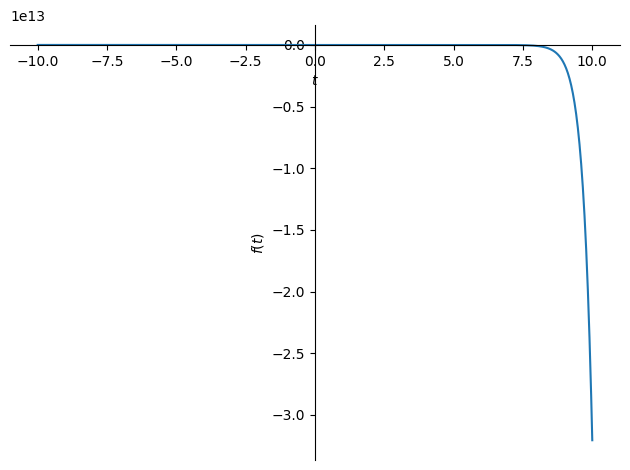

In [392]:
c5=sp.plotting.plot(Inverse_5_of)

#### Ejercicio g)

In [394]:
import sympy as sp #métodos numéricos
import numpy as np #vectores
import scipy as pp #calculos simbólicos
import matplotlib as mpl
import matplotlib.pyplot as plt

#from sympy import init_printing
#sp.init_printing()
t, s = sp.symbols("t, s") #declaración de variables
y=sp.Function('y')

In [395]:
ode4=sp.Eq(y(t).diff(t,2)+25*y(t),t)
ode4

           2           
          d            
25⋅y(t) + ───(y(t)) = t
            2          
          dt           

In [396]:
ics={y(0):1, y(t).diff(t).subs(t,0):0.04} #condiciones inciales
ics

⎧         ⎛d       ⎞│         ⎫
⎨y(0): 1, ⎜──(y(t))⎟│   : 0.04⎬
⎩         ⎝dt      ⎠│t=0      ⎭

In [397]:
fun6 = y(t).diff(t,2)+25*y(t)-t
Fs_fun6 = Eq(laplace_transform(fun6, t, s, noconds=True),0)
Fs_fun6_ = Fs_fun6.subs(ics)
Fs_fun6_

 2                                                                             1     
s ⋅LaplaceTransform(y(t), t, s) - s + 25⋅LaplaceTransform(y(t), t, s) - 0.04 - ── = 0
                                                                                2    
                                                                               s     

In [398]:
Lap=laplace_transform(y(t),t,s)
Fs_fun6_sol=solve(Fs_fun6_,Lap)[0]
Fs_fun6_sol

⎛ 3         2                ⎞
⎜s  + 0.04⋅s  + 1.0          ⎟
⎜──────────────────, -∞, True⎟
⎜   2 ⎛ 2       ⎞            ⎟
⎝  s ⋅⎝s  + 25.0⎠            ⎠

In [399]:
Inverse_6=inverse_laplace_transform(Fs_fun6_sol[0],s,t)
Inverse_6_of= Inverse_6.subs(ics)
Inverse_6_of

0.04⋅t⋅θ(t) + 1.0⋅cos(5.0⋅t)⋅θ(t)

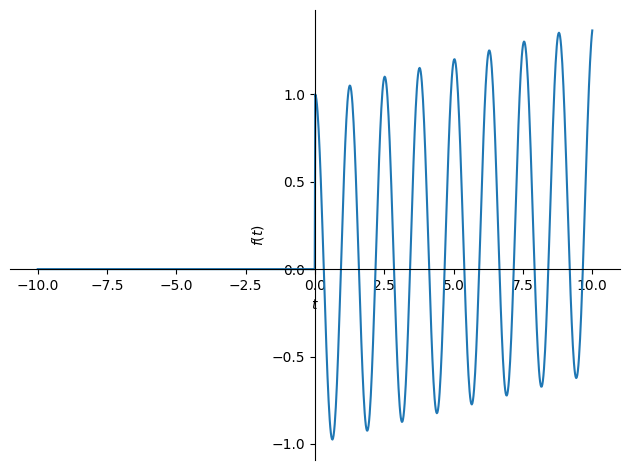

In [400]:
c6=sp.plotting.plot(Inverse_6_of)

#### Ejercicio h)

In [402]:
t, s = sp.symbols("t, s") #declaración de variables
y=sp.Function('y')

In [405]:
ode5=sp.Eq(y(t).diff(t,2)+pi**2*y(t),t**3)
ode5

           2            
 2        d            3
π ⋅y(t) + ───(y(t)) = t 
            2           
          dt            

In [406]:
ics={y(0):6/pi**4, y(t).diff(t).subs(t,0):0} #condiciones inciales
ics

⎧      6   ⎛d       ⎞│      ⎫
⎪y(0): ──, ⎜──(y(t))⎟│   : 0⎪
⎨       4  ⎝dt      ⎠│t=0   ⎬
⎪      π                    ⎪
⎩                           ⎭

In [407]:
fun7 = y(t).diff(t,2)+pi**2*y(t)-t**3
Fs_fun7 = Eq(laplace_transform(fun7, t, s, noconds=True),0)
Fs_fun7_ = Fs_fun7.subs(ics)
Fs_fun7_

 2                                6⋅s    2                                6     
s ⋅LaplaceTransform(y(t), t, s) - ─── + π ⋅LaplaceTransform(y(t), t, s) - ── = 0
                                   4                                       4    
                                  π                                       s     

In [408]:
Lap=laplace_transform(y(t),t,s)
Fs_fun7_sol=solve(Fs_fun7_,Lap)[0]
Fs_fun7_sol

⎛    ⎛ 5    4⎞            ⎞
⎜  6⋅⎝s  + π ⎠            ⎟
⎜───────────────, -∞, True⎟
⎜ 4  4 ⎛ 2    2⎞          ⎟
⎝π ⋅s ⋅⎝s  + π ⎠          ⎠

In [409]:
Inverse_7=inverse_laplace_transform(Fs_fun7_sol[0],s,t)
Inverse_7_of= Inverse_7.subs(ics)
Inverse_7_of

  ⎛ 2  3                                           ⎞
  ⎜π ⋅t ⋅θ(t)            ⎛sin(π⋅t)           ⎞     ⎟
6⋅⎜────────── - t⋅θ(t) + ⎜──────── + cos(π⋅t)⎟⋅θ(t)⎟
  ⎝    6                 ⎝   π               ⎠     ⎠
────────────────────────────────────────────────────
                          4                         
                         π                          

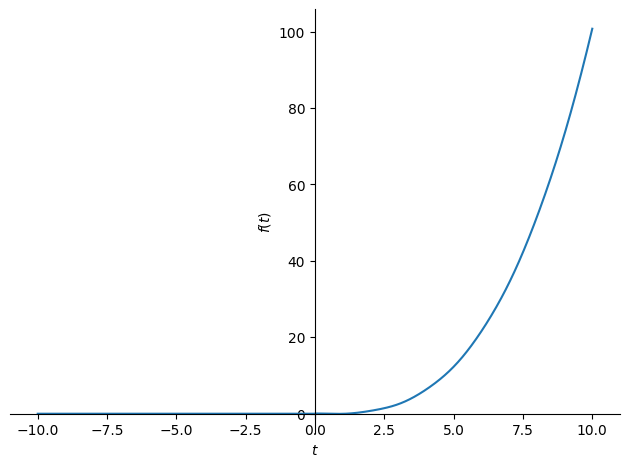

In [410]:
c7=sp.plotting.plot(Inverse_7_of)

#### Ejercicio c)

In [412]:
t, s, A, B, omega= sp.symbols("t, s, A, B, omega") #declaración de variables

y=sp.Function('y')

In [414]:
ode6=sp.Eq(y(t).diff(t,2)+omega**2*y(t),0)
ode6

           2           
 2        d            
ω ⋅y(t) + ───(y(t)) = 0
            2          
          dt           

In [415]:
ics={y(0):A, y(t).diff(t).subs(t,0):B} #condiciones inciales
ics

⎧         ⎛d       ⎞│      ⎫
⎨y(0): A, ⎜──(y(t))⎟│   : B⎬
⎩         ⎝dt      ⎠│t=0   ⎭

In [416]:
fun8 = y(t).diff(t,2)+omega**2*y(t)
Fs_fun8 = Eq(laplace_transform(fun8, t, s, noconds=True),0)
Fs_fun8_ = Fs_fun8.subs(ics)
Fs_fun8_

            2                                 2                                 
-A⋅s - B + ω ⋅LaplaceTransform(y(t), t, s) + s ⋅LaplaceTransform(y(t), t, s) = 0

In [417]:
Lap=laplace_transform(y(t),t,s)
Fs_fun8_sol=solve(Fs_fun8_,Lap)[0]
Fs_fun8_sol

⎛A⋅s + B          ⎞
⎜───────, -∞, True⎟
⎜ 2    2          ⎟
⎝ω  + s           ⎠

In [418]:
Inverse_8=inverse_laplace_transform(Fs_fun8_sol[0],s,t)
Inverse_8_of= Inverse_8.subs(ics)
Inverse_8_of

⎛                  ⎛     ____⎞⎞     
⎜                  ⎜    ╱  2 ⎟⎟     
⎜             B⋅sin⎝t⋅╲╱  ω  ⎠⎟     
⎜A⋅cos(ω⋅t) + ────────────────⎟⋅θ(t)
⎜                    ____     ⎟     
⎜                   ╱  2      ⎟     
⎝                 ╲╱  ω       ⎠     

In [424]:
Inverse_AB= Inverse_8.subs(A,1).subs(B,0).subs(omega,2)
Inverse_AB

cos(2⋅t)⋅θ(t)

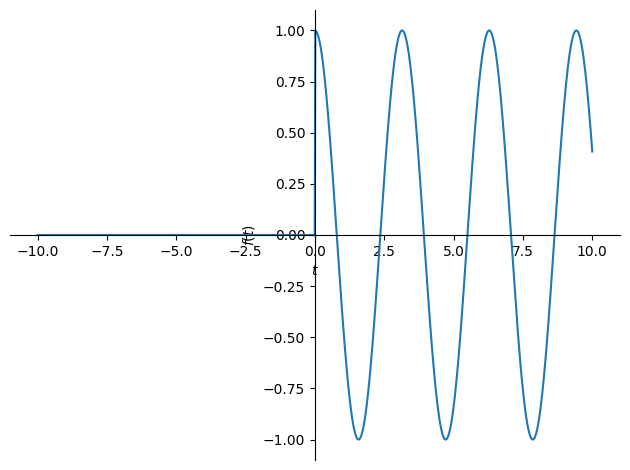

In [425]:
c8=sp.plotting.plot(Inverse_AB)